In [ ]:
import subprocess
import sys

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import altair as alt
import folium


In [ ]:
df = pd.read_csv('/content/sample_data/worlddata.csv')

In [ ]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [ ]:
df.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [ ]:
df.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

# Data preaparation and cleaning


In [ ]:
df['Year'] = df['Year'].astype(int)

df_filtered = df[(df['Year'] >= 1990) & (df['Year'] <= 2010)]

In [ ]:
selected_indicators = [
    'CO2 emissions (kt)',
    'CO2 emissions (metric tons per capita)',
    'Alternative and nuclear energy (% of total energy use)',
    'Electricity production from renewable sources, excluding hydroelectric (% of total)',
    'Fossil fuel energy consumption (% of total)',
    'Energy use (kg of oil equivalent per capita)',
    'Electric power consumption (kWh per capita)',
    'Electricity production from coal, gas, and oil sources (% of total)',
    'Energy imports, net (% of energy use)',
    'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
    'CO2 emissions from transport (% of total fuel combustion)',
    'GDP per capita (constant 2005 US$)',
    'Population, total',
    'Urban population (% of total)',
    'Rural population (% of total population)'
]


regions = {
    "Sub-Saharan Africa (all income levels)": "SSA",
    "North America": "NAC",
    "Europe & Central Asia (all income levels)": "ECS",
    "East Asia & Pacific (all income levels)": "EAS",
    "South Asia": "SAS",
    "Latin America & Caribbean (all income levels)": "LCN",
    "Arab World": "ARB"
}

df['Region'] = df['CountryName'].map(regions)

regions_of_interest = ['SSA', 'NAC', 'ECS', 'EAS', 'SAS', 'LCN', 'ARB']
df_filtered = df[df['Region'].isin(regions_of_interest)]
df_selected = df[df['IndicatorName'].isin(selected_indicators) & (df['Year'] >= 1990) & (df['Year'] <= 2010)]

df_indicators = df_selected.pivot_table(
    index='Year',
    columns=['Region', 'IndicatorName'],
    values='Value',
    aggfunc='mean'
)

df_indicators.fillna(0, inplace=True)

#Time Series of CO2 Emissions (kt) by Region

This analysis presents the changes in CO2 emissions, which are a critical component of the research question concerning energy consumption and sustainable development. The varying trends across regions highlight differences in development stages, energy consumption patterns, and possibly the implementation of energy policies and technology adoption rates.

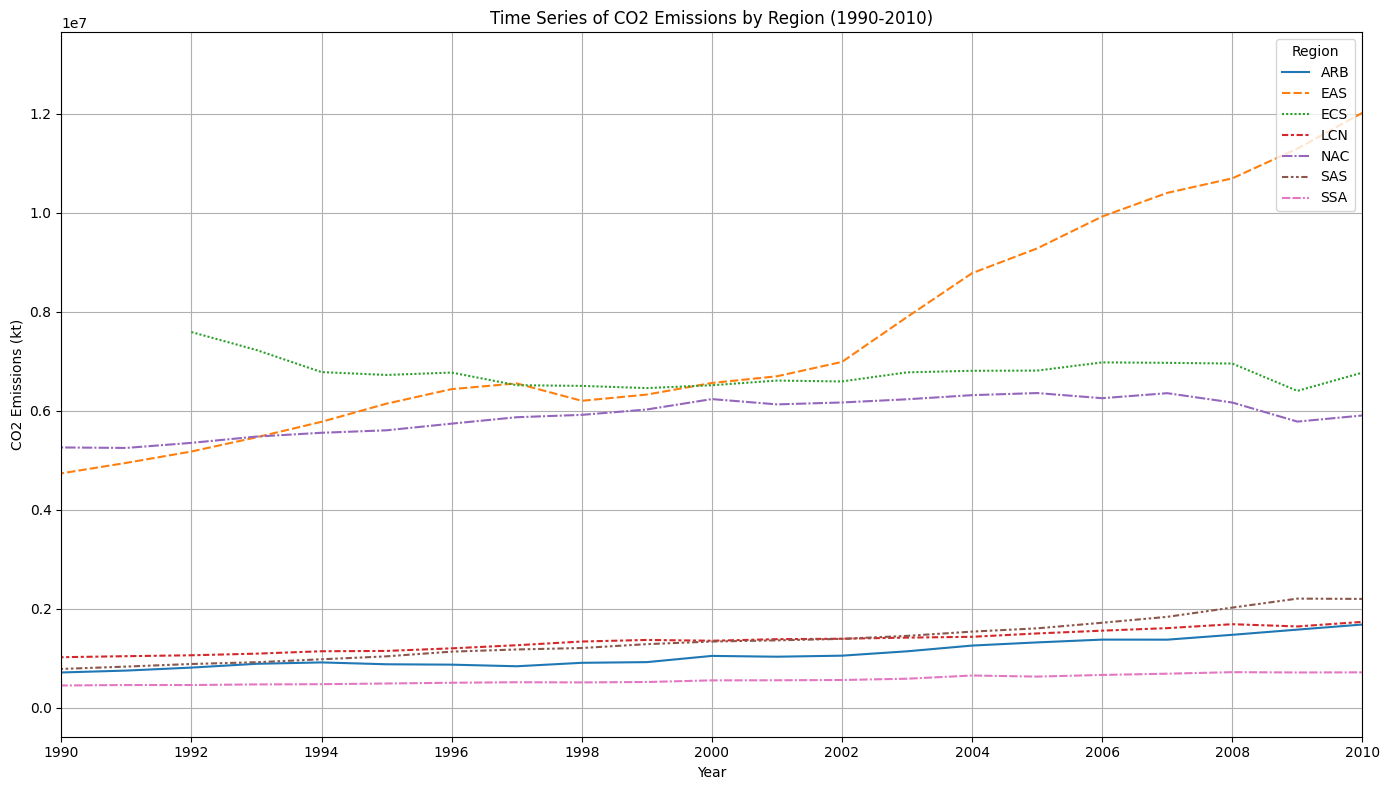

In [ ]:
co2_data = df_filtered[df_filtered['IndicatorName'] == 'CO2 emissions (kt)']
co2_pivot = co2_data.pivot_table(index='Year', columns='Region', values='Value', aggfunc='mean')


plt.figure(figsize=(14, 8))
sns.lineplot(data=co2_pivot)
plt.title('Time Series of CO2 Emissions by Region (1990-2010)')
plt.ylabel('CO2 Emissions (kt)')
plt.xlabel('Year')
plt.legend(title='Region', loc='upper right')
plt.xticks(range(1990, 2011, 2))
plt.xlim(1990, 2010)
plt.grid(True)
plt.tight_layout()
plt.show()

The high positive correlations might reflect shared developmental trajectories or reliance on similar types of energy sources, whereas the low correlations could indicate different industrial structures, energy policies, or stages of economic development.

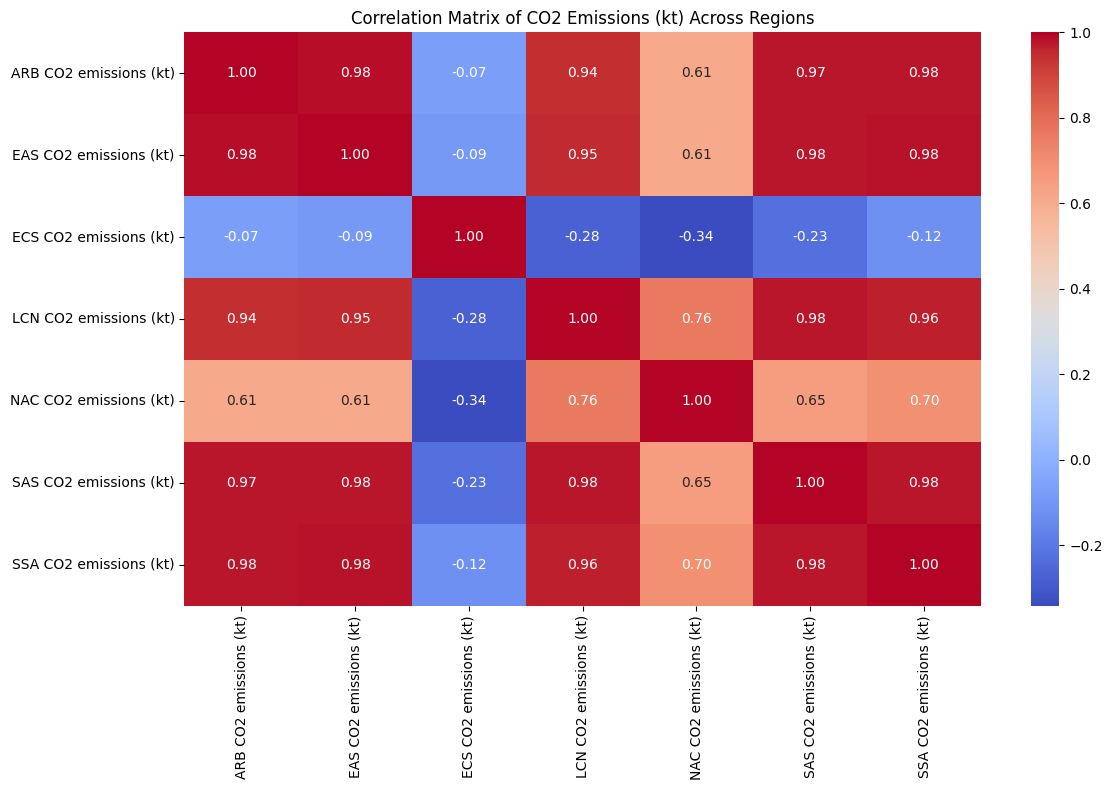

In [ ]:

co2_indicators = [
    'CO2 emissions (kt)',
    'CO2 emissions (metric tons per capita)'
]

df_co2 = df[(df['IndicatorName'].isin(co2_indicators)) & (df['Year'] >= 1990) & (df['Year'] <= 2010)]

df_co2_pivot = df_co2.pivot_table(index='Year', columns=['Region', 'IndicatorName'], values='Value', aggfunc='mean')

df_co2_pivot.columns = [' '.join(col).strip() for col in df_co2_pivot.columns.values]

co2_emissions_columns = [col for col in df_co2_pivot.columns if 'CO2 emissions (kt)' in col]
df_co2_for_corr = df_co2_pivot[co2_emissions_columns]

correlation_matrix_co2 = df_co2_for_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_co2, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of CO2 Emissions (kt) Across Regions')
plt.tight_layout()
plt.show()


# Average CO2 Emissions per Capita by Region

These per capita figures are important for understanding the individual contributions to CO2 emissions in different regions and can help in tailoring sustainable development policies that take into account both the economic and environmental needs of each region.

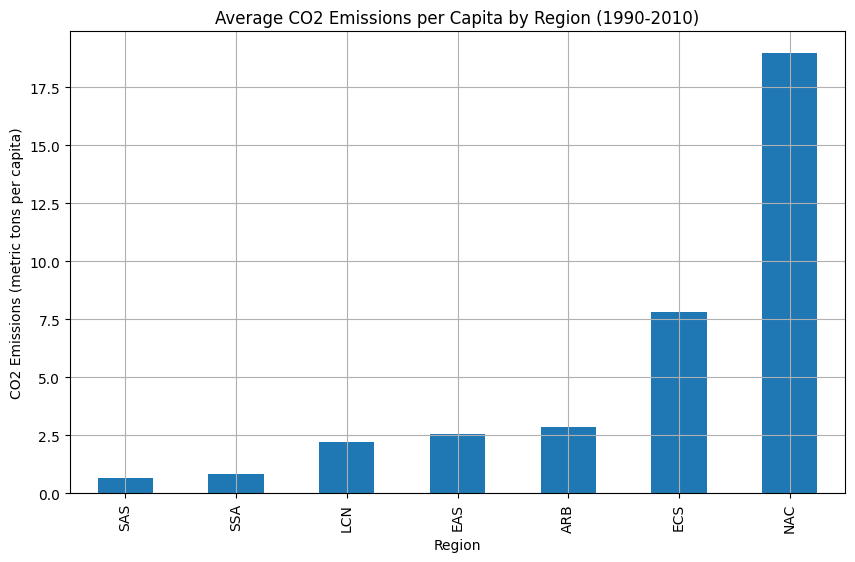

In [ ]:
co2_per_capita_data = df_filtered[df_filtered['IndicatorName'] == 'CO2 emissions (metric tons per capita)']
co2_per_capita_avg = co2_per_capita_data.groupby('Region')['Value'].mean().sort_values()

plt.figure(figsize=(10, 6))
co2_per_capita_avg.plot(kind='bar')
plt.title('Average CO2 Emissions per Capita by Region (1990-2010)')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.xlabel('Region')
plt.grid(True)
plt.show()


# Distribution of Energy Use per Capita

The distribution for most regions is right-skewed, indicating that within each region, a smaller number of countries have very high energy use, pulling the average upwards, while the majority have lower energy use.

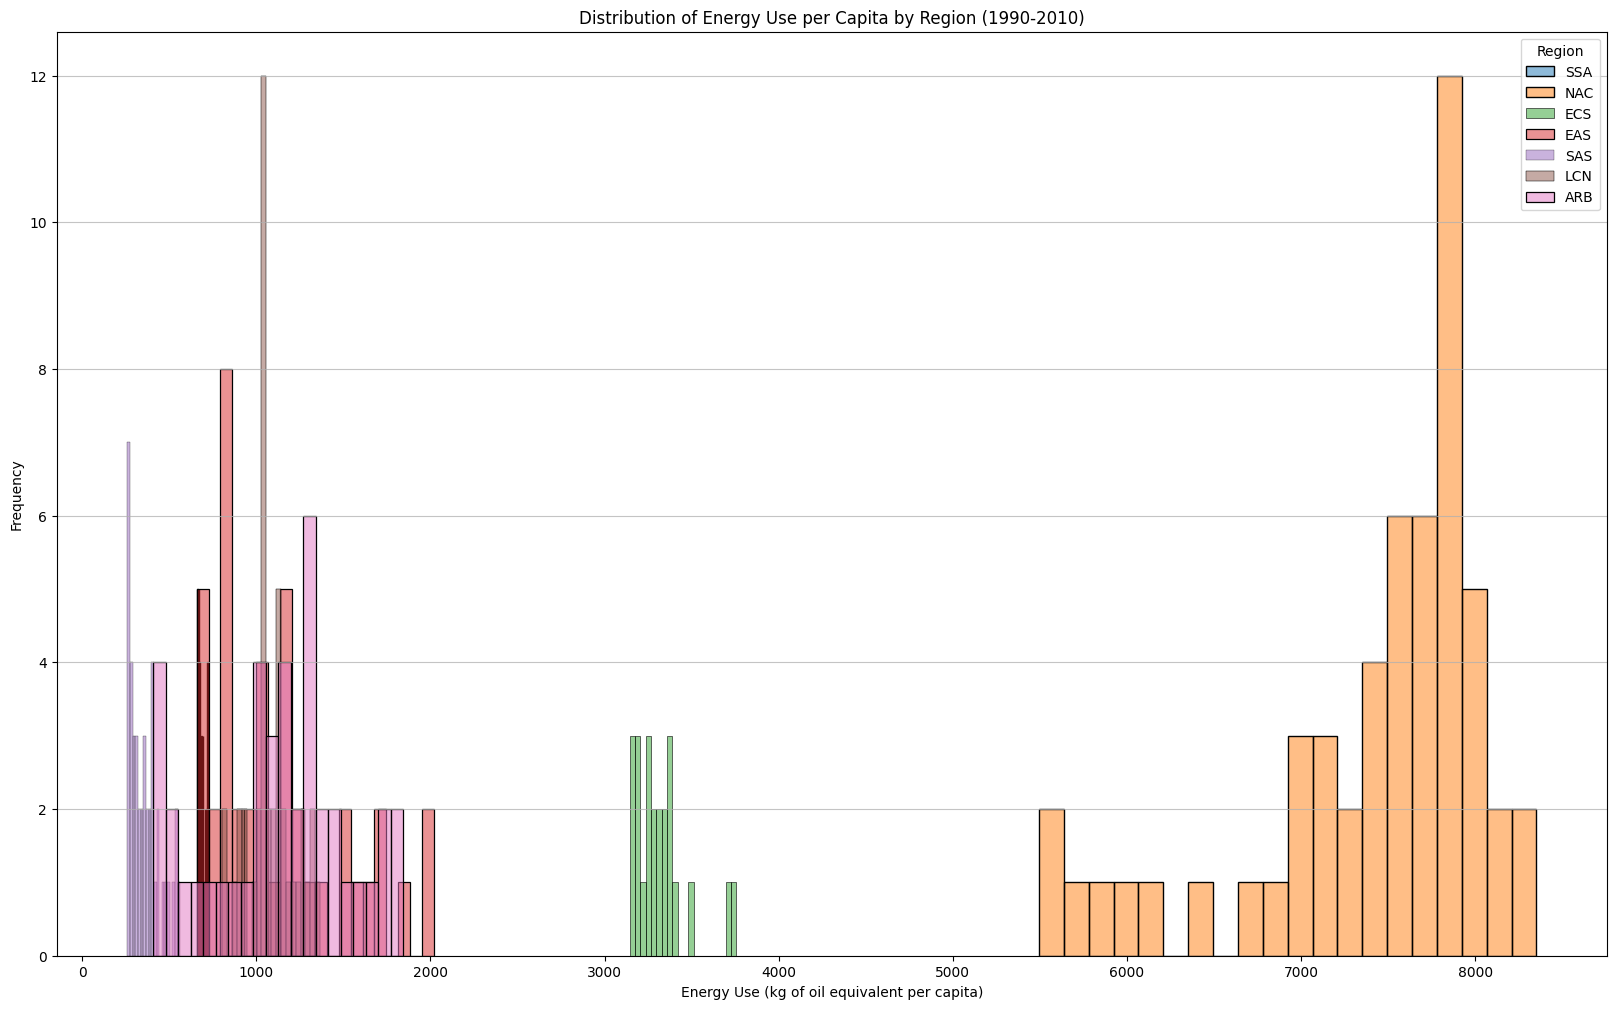

In [ ]:

energy_per_capita_data = df_filtered[df_filtered['IndicatorName'] == 'Energy use (kg of oil equivalent per capita)']

plt.figure(figsize=(20, 12))

regions_of_interest = ['SSA', 'NAC', 'ECS', 'EAS', 'SAS', 'LCN', 'ARB']
for region in regions_of_interest:

    subset = energy_per_capita_data[energy_per_capita_data['Region'] == region]

    sns.histplot(subset['Value'], bins=20, label=region, kde=False, alpha=0.5)

plt.title('Distribution of Energy Use per Capita by Region (1990-2010)')
plt.xlabel('Energy Use (kg of oil equivalent per capita)')
plt.ylabel('Frequency')
plt.legend(title='Region')
plt.grid(axis='y', alpha=0.75)
plt.show()



#GDP per Capita vs. CO2 Emissions per Capita

This scatter plot with trend lines illustrates the relationship between GDP per capita and CO2 emissions per capita across various regions from 1990 to 2010. It indicates that higher GDP per capita is generally associated with higher CO2 emissions per capita, which is particularly evident in developed regions like North America (NAC) and Europe & Central Asia (ECS), where wealthier economies have higher levels of emissions.

<Figure size 1000x600 with 0 Axes>

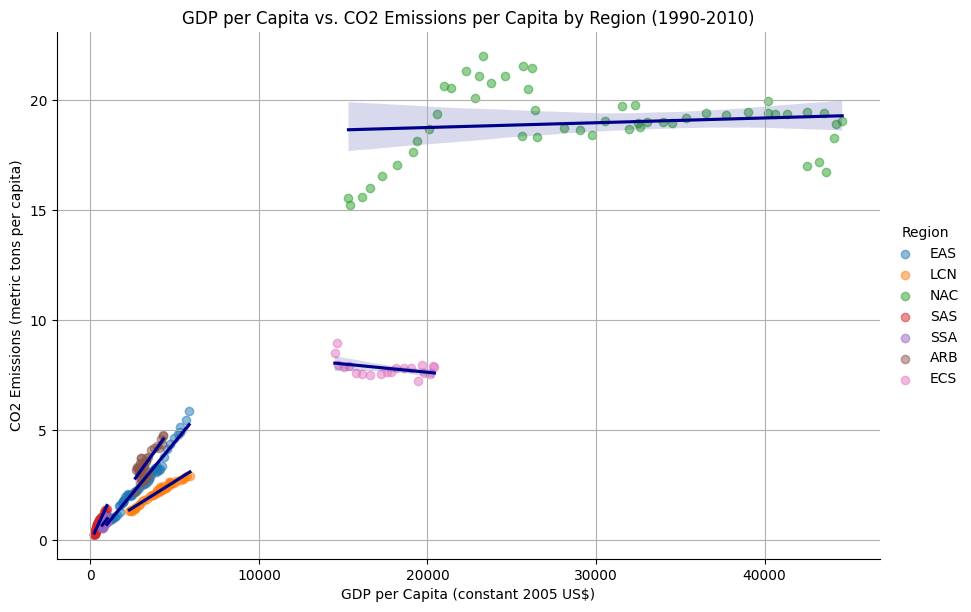

In [ ]:

gdp_data = df_filtered[df_filtered['IndicatorName'] == 'GDP per capita (constant 2005 US$)']
co2_data = df_filtered[df_filtered['IndicatorName'] == 'CO2 emissions (metric tons per capita)']

merged_data = pd.merge(gdp_data, co2_data, on=['Year', 'Region'], suffixes=('_gdp', '_co2'))

plt.figure(figsize=(10, 6))
sns.lmplot(x='Value_gdp', y='Value_co2', data=merged_data,
           hue='Region',
           height=6, aspect=1.5,
           scatter_kws={'alpha':0.5}, line_kws={'color':'darkblue'})
plt.title('GDP per Capita vs. CO2 Emissions per Capita by Region (1990-2010)')
plt.xlabel('GDP per Capita (constant 2005 US$)')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.grid(True)
plt.show()



# Alternative and Nuclear Energy Usage vs. CO2 Emissions per Capita by Region

The trend lines fitted through the data points for each region suggest that there is no strong inverse relationship between the use of alternative and nuclear energy and CO2 emissions per capita, which could be expected if these energy sources were effectively displacing fossil fuels. This could imply that other factors, such as energy efficiency, industrial structure, and overall energy consumption, are also at play in determining CO2 emissions.

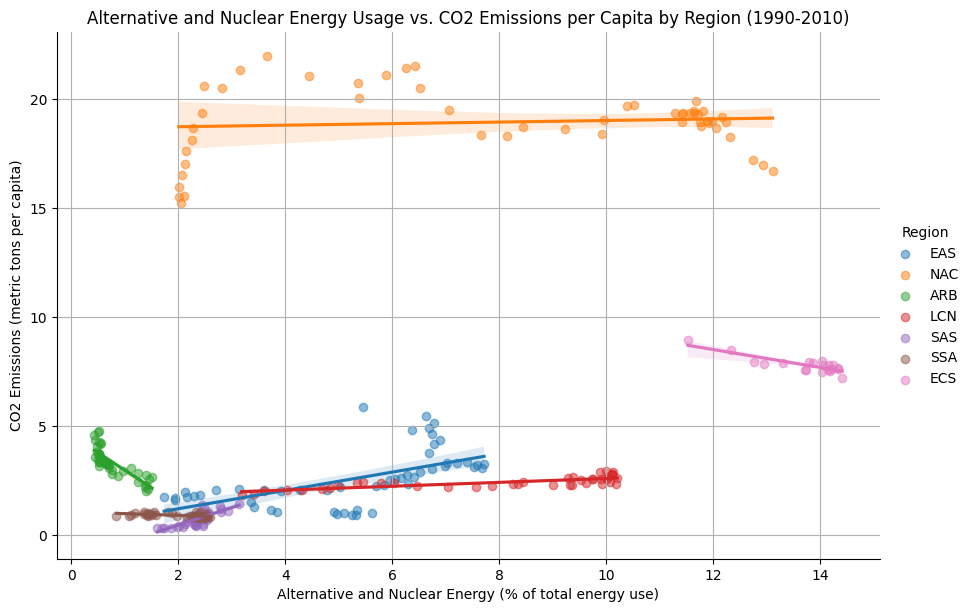

In [ ]:

alt_nuclear_energy_data = df_filtered[df_filtered['IndicatorName'] == 'Alternative and nuclear energy (% of total energy use)']

merged_energy_co2_data = pd.merge(
    alt_nuclear_energy_data,
    co2_data,
    on=['Year', 'Region'],
    suffixes=('_alt_nuclear_energy', '_co2')
)

sns.lmplot(
    x='Value_alt_nuclear_energy',
    y='Value_co2',
    data=merged_energy_co2_data,
    hue='Region',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.5}
)

plt.title('Alternative and Nuclear Energy Usage vs. CO2 Emissions per Capita by Region (1990-2010)')
plt.xlabel('Alternative and Nuclear Energy (% of total energy use)')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.grid(True)
plt.show()


# Distribution of CO2 Emissions from Electricity and Heat Production

The width of the plot at various levels indicates the frequency or density of data points at that level of emissions.
The white dot represents the median of the data.
The thick bar in the center of the violin indicates the interquartile range.

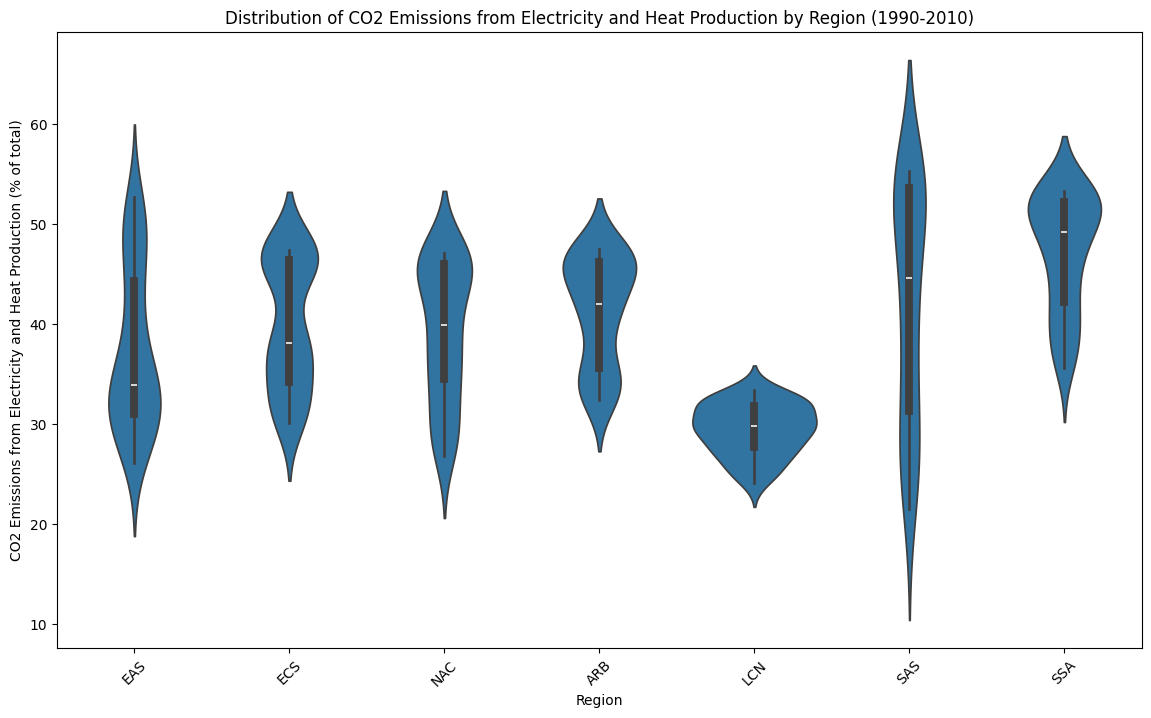

In [ ]:

co2_electric_heat_data = df_filtered[df_filtered['IndicatorName'] == 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)']

plt.figure(figsize=(14, 8))
sns.violinplot(data=co2_electric_heat_data, x='Region', y='Value')
plt.title('Distribution of CO2 Emissions from Electricity and Heat Production by Region (1990-2010)')
plt.xlabel('Region')
plt.ylabel('CO2 Emissions from Electricity and Heat Production (% of total)')
plt.xticks(rotation=45)
plt.show()




# Average CO2 Emissions per Capita by Region

The data suggest a correlation between a region's development stage and its CO2 emissions per capita, with more developed regions showing higher emissions per person. This information is critical for understanding each region's contribution to global CO2 emissions and may indicate the need for tailored approaches to reducing emissions in different areas.

<ipython-input-43-f72fc2732667>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




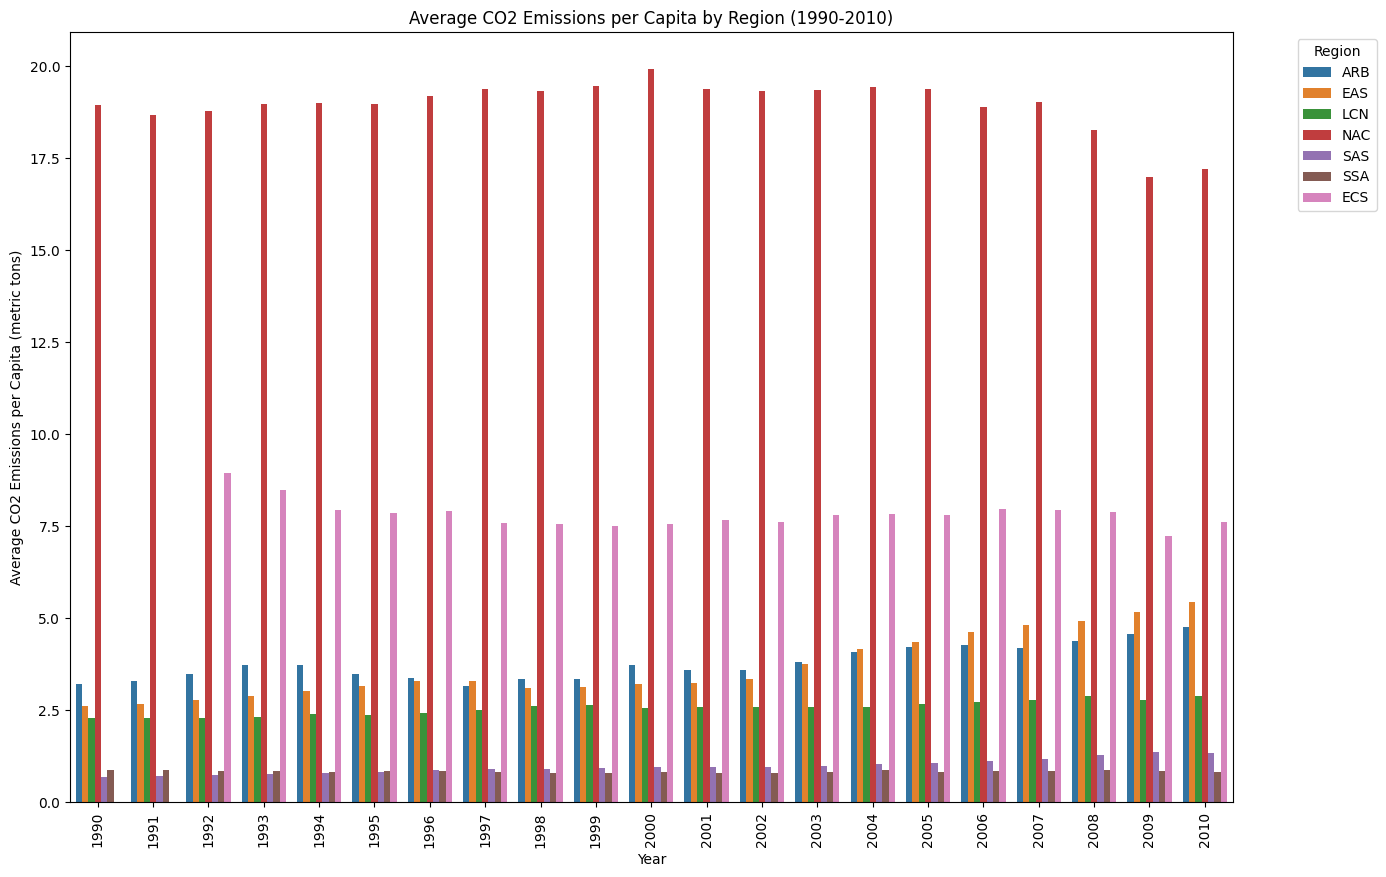

In [ ]:

co2_avg_per_year_region = co2_data.groupby(['Year', 'Region'])['Value'].mean().reset_index()

co2_avg_per_year_region = co2_avg_per_year_region[(co2_avg_per_year_region['Year'] >= 1990) & (co2_avg_per_year_region['Year'] <= 2010)]

plt.figure(figsize=(15, 10))
barplot = sns.barplot(data=co2_avg_per_year_region, x='Year', y='Value', hue='Region', ci=None)

plt.title('Average CO2 Emissions per Capita by Region (1990-2010)')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions per Capita (metric tons)')

plt.xticks(rotation=90)

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlim(-0.5, len(co2_avg_per_year_region['Year'].unique())-0.5)
plt.show()


# Time Series of Renewable Energy Production

This trend towards renewables is crucial for the sustainable development of these regions, as it may contribute to a reduction in carbon emissions and lessen the reliance on fossil fuels. The increasing curves in the later years are particularly promising, signaling a possible acceleration in the adoption of cleaner energy sources.

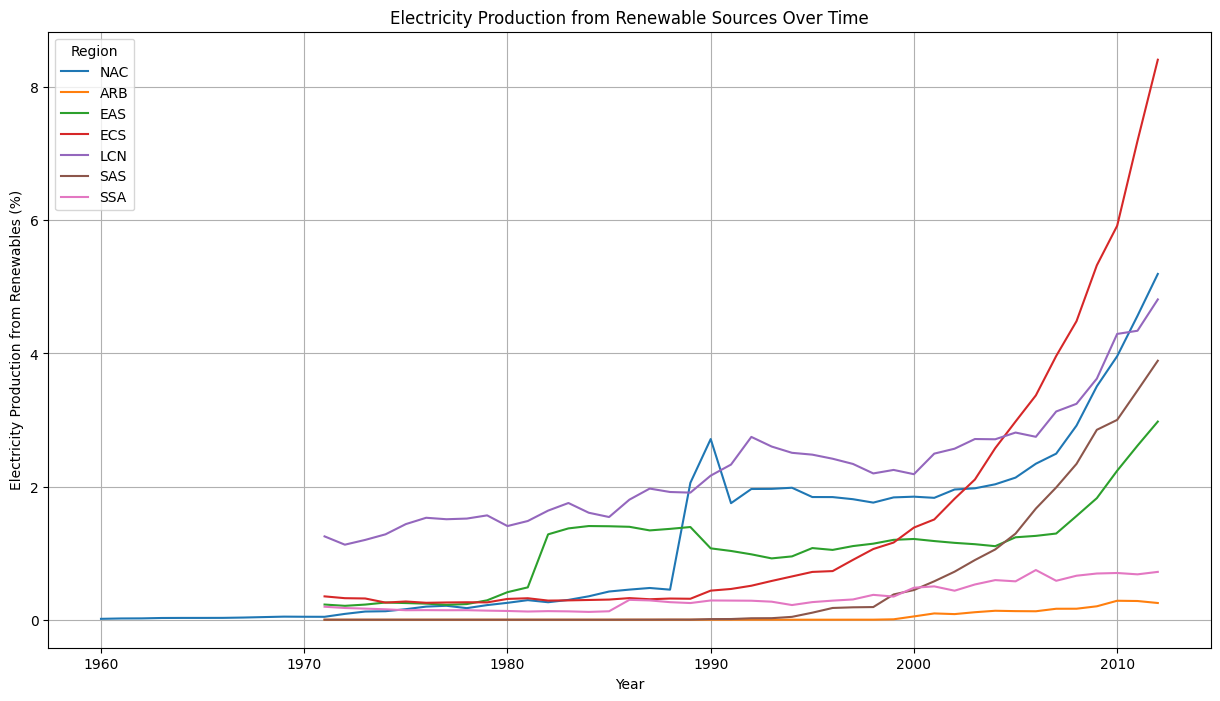

In [ ]:

renewable_energy_data = df_filtered[df_filtered['IndicatorName'] == 'Electricity production from renewable sources, excluding hydroelectric (% of total)']

plt.figure(figsize=(15, 8))
sns.lineplot(data=renewable_energy_data, x='Year', y='Value', hue='Region')
plt.title('Electricity Production from Renewable Sources Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Production from Renewables (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


# CO2 Emissions and Economic Development

The scatter plot visualizes the relationship between CO2 emissions per capita and GDP per capita (measured in constant 2005 US dollars) for various regions. This relationship is often studied to understand the environmental impacts of economic growth.

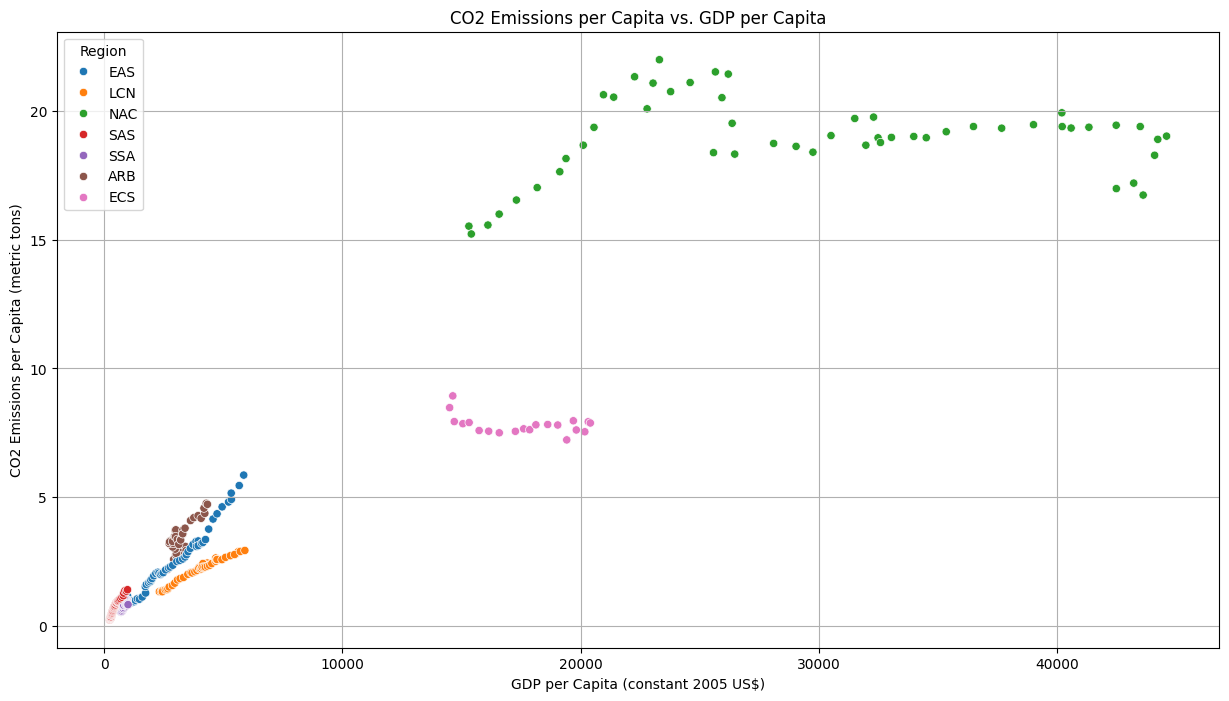

In [ ]:

gdp_co2_merged = pd.merge(
    df_filtered[df_filtered['IndicatorName'] == 'GDP per capita (constant 2005 US$)'],
    df_filtered[df_filtered['IndicatorName'] == 'CO2 emissions (metric tons per capita)'],
    on=['Year', 'Region'],
    suffixes=('_gdp', '_co2')
)

plt.figure(figsize=(15, 8))
sns.scatterplot(data=gdp_co2_merged, x='Value_gdp', y='Value_co2', hue='Region')
plt.title('CO2 Emissions per Capita vs. GDP per Capita')
plt.xlabel('GDP per Capita (constant 2005 US$)')
plt.ylabel('CO2 Emissions per Capita (metric tons)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


# Energy imports trends by regions

The pronounced change in EAS highlights the region's significant shift towards reliance on external energy sources. For regions with stable lines, the data suggest a sustained energy production strategy that either relies on a consistent level of imports or balances out domestic production with the necessary imports.

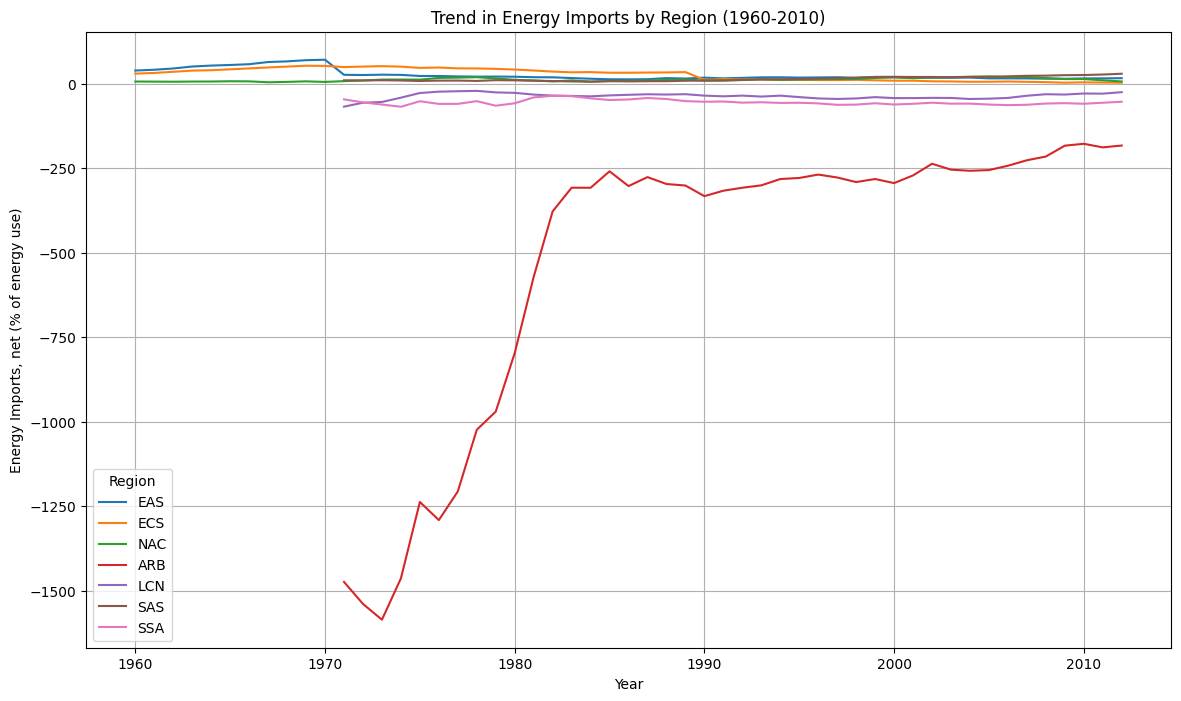

In [ ]:

energy_imports_data = df_filtered[df_filtered['IndicatorName'] == 'Energy imports, net (% of energy use)']

plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Value', hue='Region', data=energy_imports_data)
plt.title('Trend in Energy Imports by Region (1960-2010)')
plt.xlabel('Year')
plt.ylabel('Energy Imports, net (% of energy use)')
plt.legend(title='Region')
plt.grid(True)
plt.show()



#  Fossil Fuel Consumption and Alternative Energy

In summary, these trends reflect the varying stages of energy consumption and the transition to alternative energy sources in different regions. Developed regions (NAC, ECS) show significant reliance on fossil fuels with gradual movements towards alternative energies. Developing regions (SSA, SAS) have lower levels of energy consumption overall and have not yet significantly adopted alternative energy.

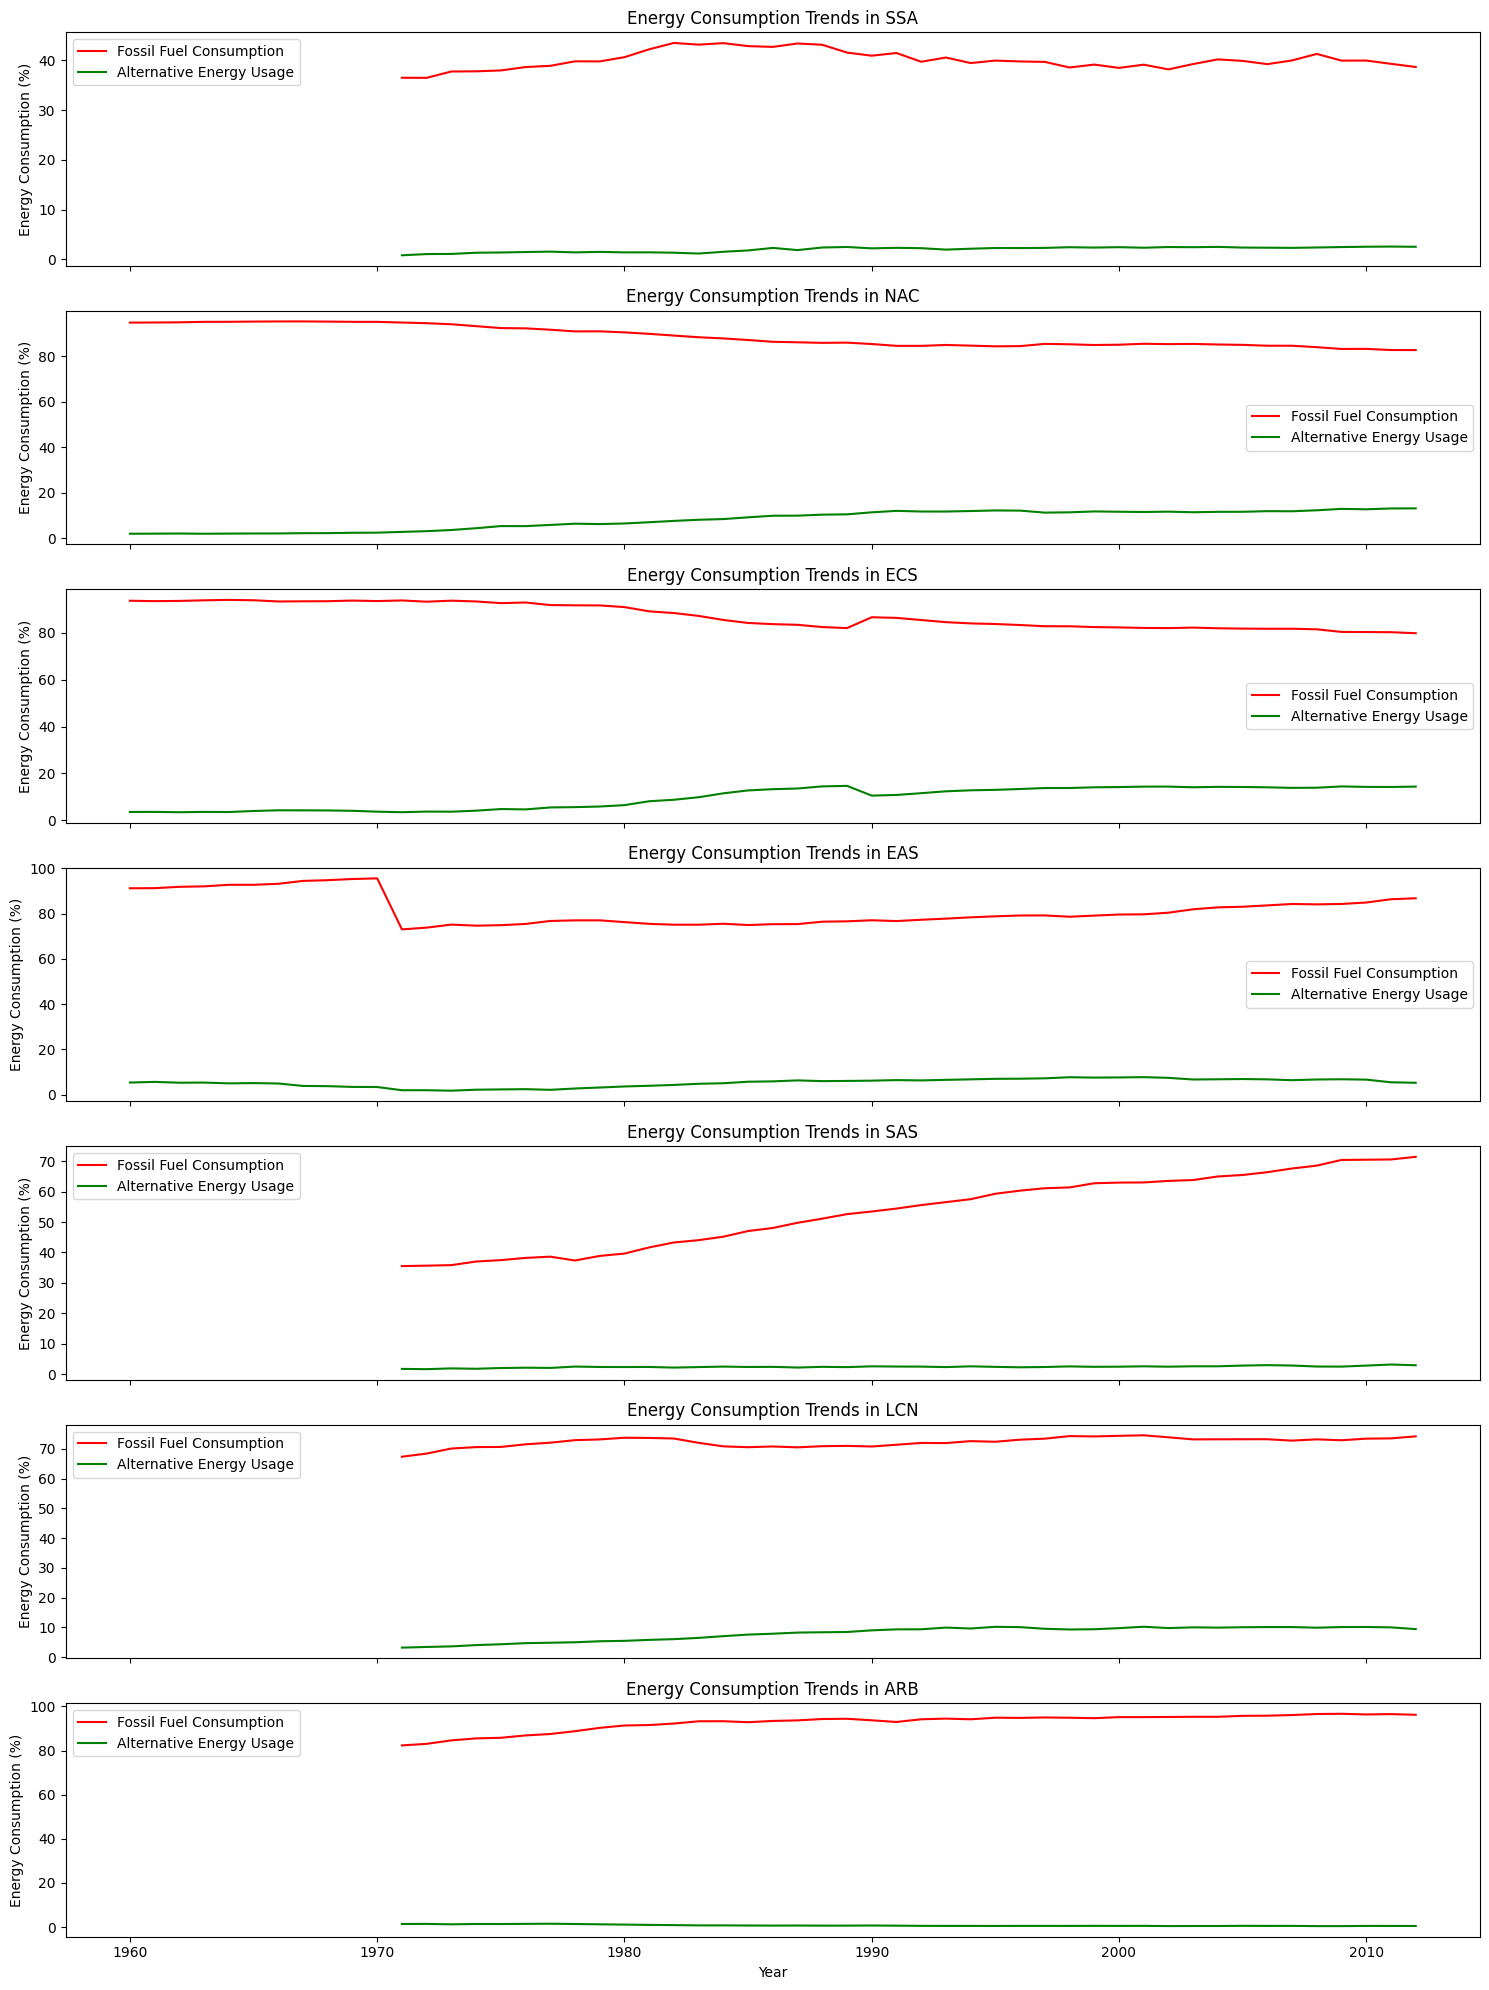

In [ ]:

fossil_fuel_data = df_filtered[df_filtered['IndicatorName'] == 'Fossil fuel energy consumption (% of total)']
alternative_energy_data = df_filtered[df_filtered['IndicatorName'] == 'Alternative and nuclear energy (% of total energy use)']

fig, axes = plt.subplots(nrows=len(regions_of_interest), ncols=1, figsize=(15, 20), sharex=True)

for ax, region in zip(axes, regions_of_interest):
    region_fossil_fuel_data = fossil_fuel_data[fossil_fuel_data['Region'] == region]
    region_alternative_energy_data = alternative_energy_data[alternative_energy_data['Region'] == region]

    sns.lineplot(ax=ax, data=region_fossil_fuel_data, x='Year', y='Value', label='Fossil Fuel Consumption', color='red')
    sns.lineplot(ax=ax, data=region_alternative_energy_data, x='Year', y='Value', label='Alternative Energy Usage', color='green')

    ax.set_title(f'Energy Consumption Trends in {region}')
    ax.set_ylabel('Energy Consumption (%)')
    ax.legend()

plt.xlabel('Year')
plt.tight_layout()
plt.show()


# Energy use vs Electric power consumption (over time)

This transition is critical for understanding how energy consumption patterns are changing and could have implications for how sustainable development goals are approached, particularly with regards to increasing efficiency and promoting the use of renewable energy sources in electricity production.

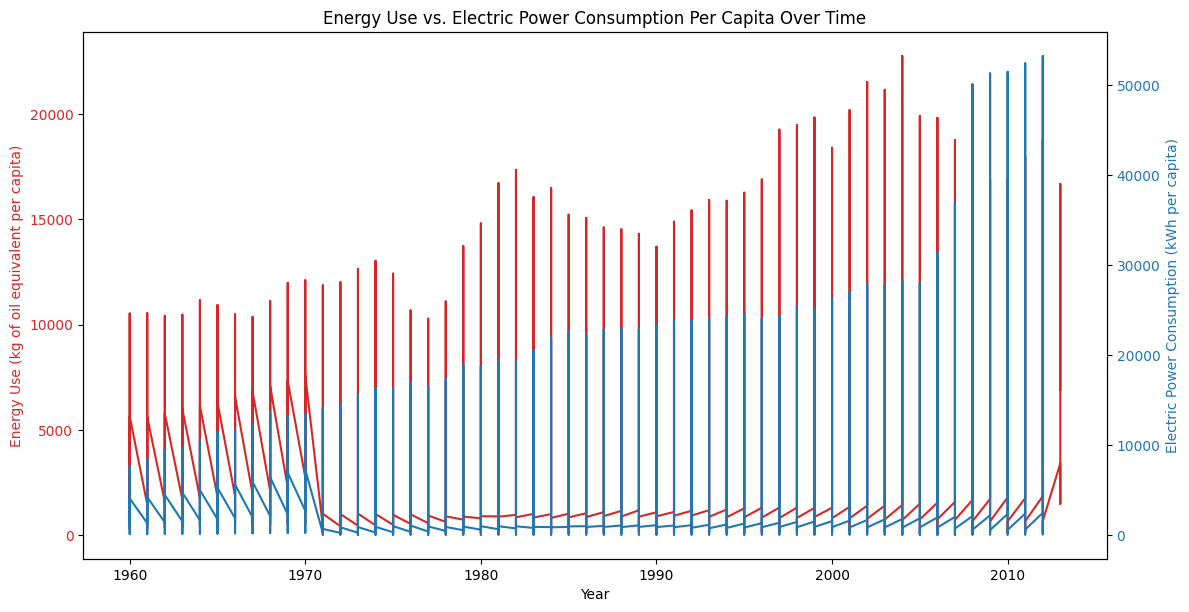

In [ ]:

energy_use_data = df[df['IndicatorName'] == 'Energy use (kg of oil equivalent per capita)']
power_consumption_data = df[df['IndicatorName'] == 'Electric power consumption (kWh per capita)']

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Use (kg of oil equivalent per capita)', color=color)
ax1.plot(energy_use_data['Year'], energy_use_data['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Electric Power Consumption (kWh per capita)', color=color)
ax2.plot(power_consumption_data['Year'], power_consumption_data['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Energy Use vs. Electric Power Consumption Per Capita Over Time')
plt.show()

# Urban vs Rural CO2 emissions contribution over the years

The shaded areas suggest the variability or uncertainty in the estimates, with urban emissions having a broader range, possibly due to the complexity and diversity of energy sources and uses within urban environments. The trend indicates the importance of focusing on urban areas for CO2 emissions reduction strategies, such as improving energy efficiency, developing public transportation, and increasing green spaces.

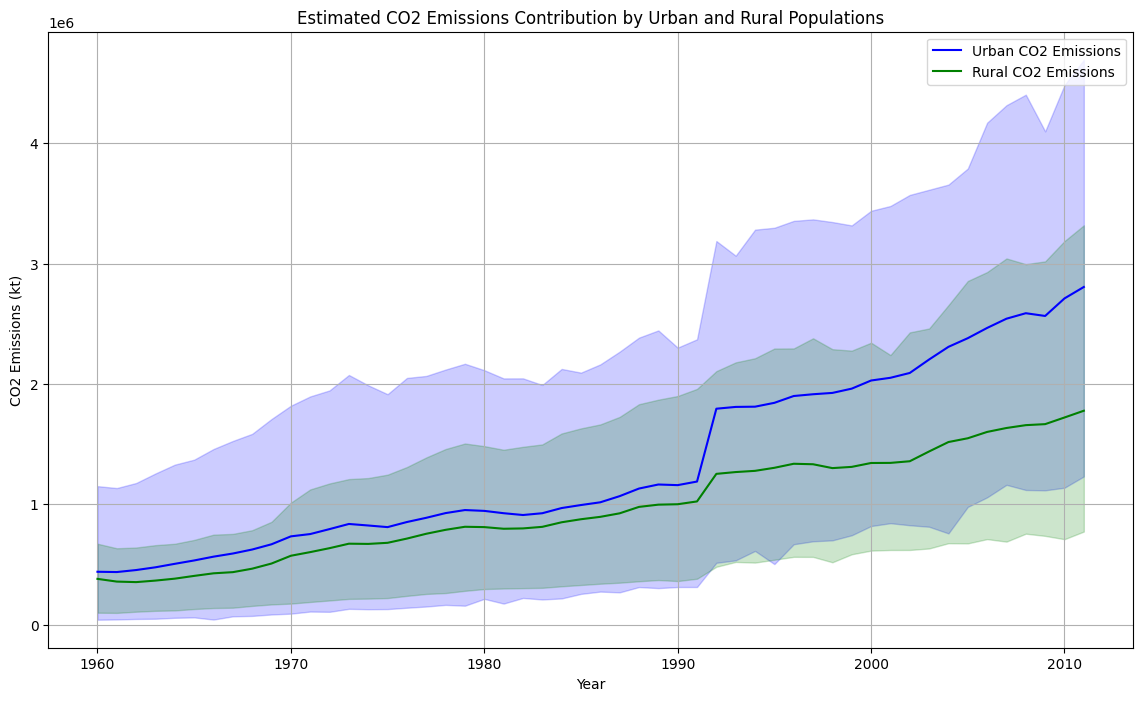

In [ ]:

total_co2_data = df_filtered[df_filtered['IndicatorName'] == 'CO2 emissions (kt)'].groupby(['Year', 'Region'])['Value'].sum().reset_index()

urban_population_data = df_filtered[df_filtered['IndicatorName'] == 'Urban population (% of total)']
urban_co2_data = pd.merge(total_co2_data, urban_population_data, on=['Year', 'Region'])

urban_co2_data['Urban_CO2'] = urban_co2_data['Value_x'] * (urban_co2_data['Value_y'] / 100)

rural_population_data = df_filtered[df_filtered['IndicatorName'] == 'Rural population (% of total population)']
rural_co2_data = pd.merge(total_co2_data, rural_population_data, on=['Year', 'Region'])

rural_co2_data['Rural_CO2'] = rural_co2_data['Value_x'] * (rural_co2_data['Value_y'] / 100)

plt.figure(figsize=(14, 8))

sns.lineplot(data=urban_co2_data, x='Year', y='Urban_CO2', label='Urban CO2 Emissions', color='blue')
sns.lineplot(data=rural_co2_data, x='Year', y='Rural_CO2', label='Rural CO2 Emissions', color='green')

plt.title('Estimated CO2 Emissions Contribution by Urban and Rural Populations')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.grid(True)
plt.show()


# GDP Growth vs CO2Emissions

This graph is useful for understanding the challenges and progress related to economic growth and environmental sustainability. It highlights the need for strategies that support continued economic development while minimizing environmental impact, such as investing in renewable energy, promoting energy efficiency, and implementing policies that support sustainable practices.

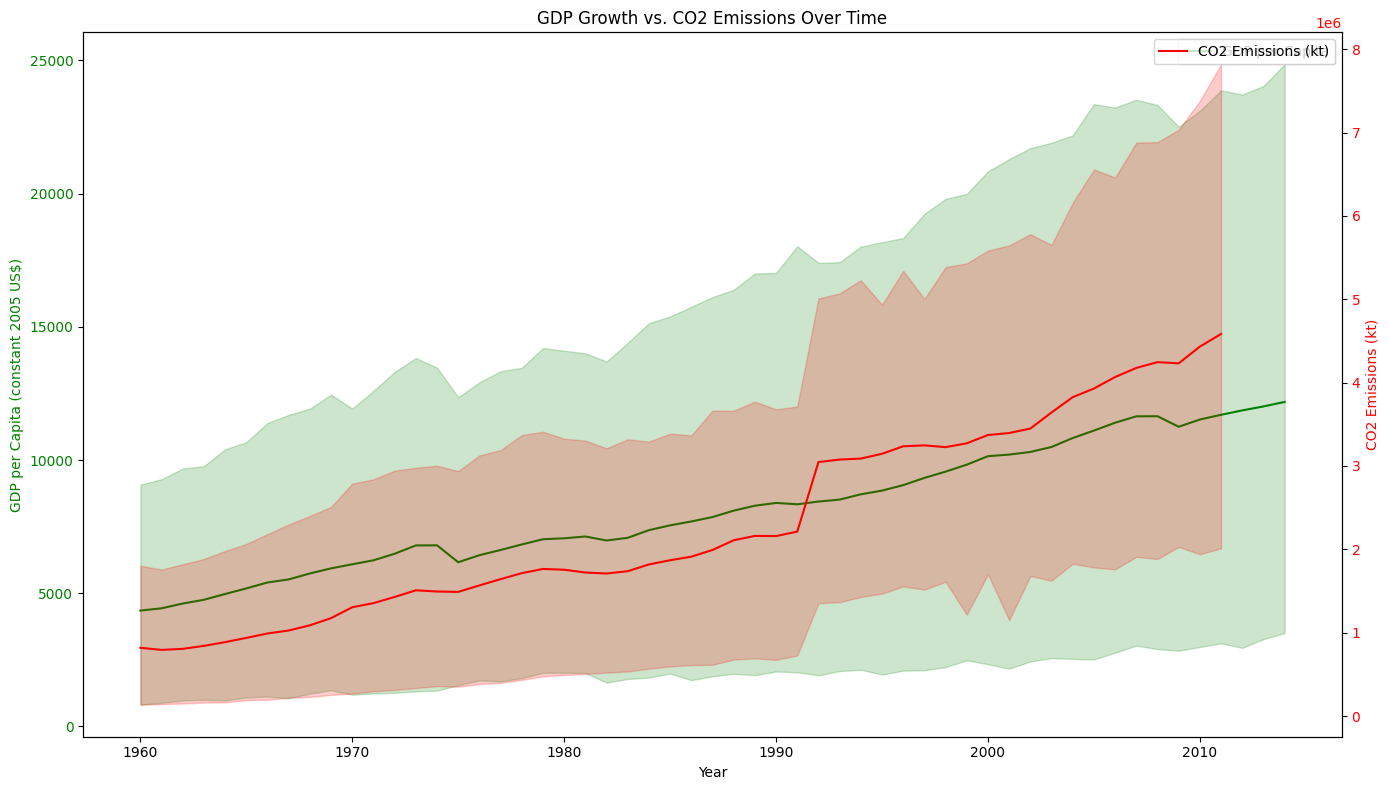

In [ ]:

co2_kt_data = df_filtered[df_filtered['IndicatorName'] == 'CO2 emissions (kt)']
gdp_data = df_filtered[df_filtered['IndicatorName'] == 'GDP per capita (constant 2005 US$)']

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.lineplot(ax=ax1, x='Year', y='Value', data=gdp_data, label='GDP per Capita', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per Capita (constant 2005 US$)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
sns.lineplot(ax=ax2, x='Year', y='Value', data=co2_kt_data, label='CO2 Emissions (kt)', color='red')
ax2.set_ylabel('CO2 Emissions (kt)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('GDP Growth vs. CO2 Emissions Over Time')
fig.tight_layout()
plt.show()


# Intensity of CO2 Emissions

The CO2 intensity metric is an important indicator of how efficiently a region's economy uses energy. Lower CO2 intensity means that a region is producing less CO2 for every unit of GDP, which is often a sign of advancements in technology, shifts to a service-oriented economy, or greater use of renewable energy sources.

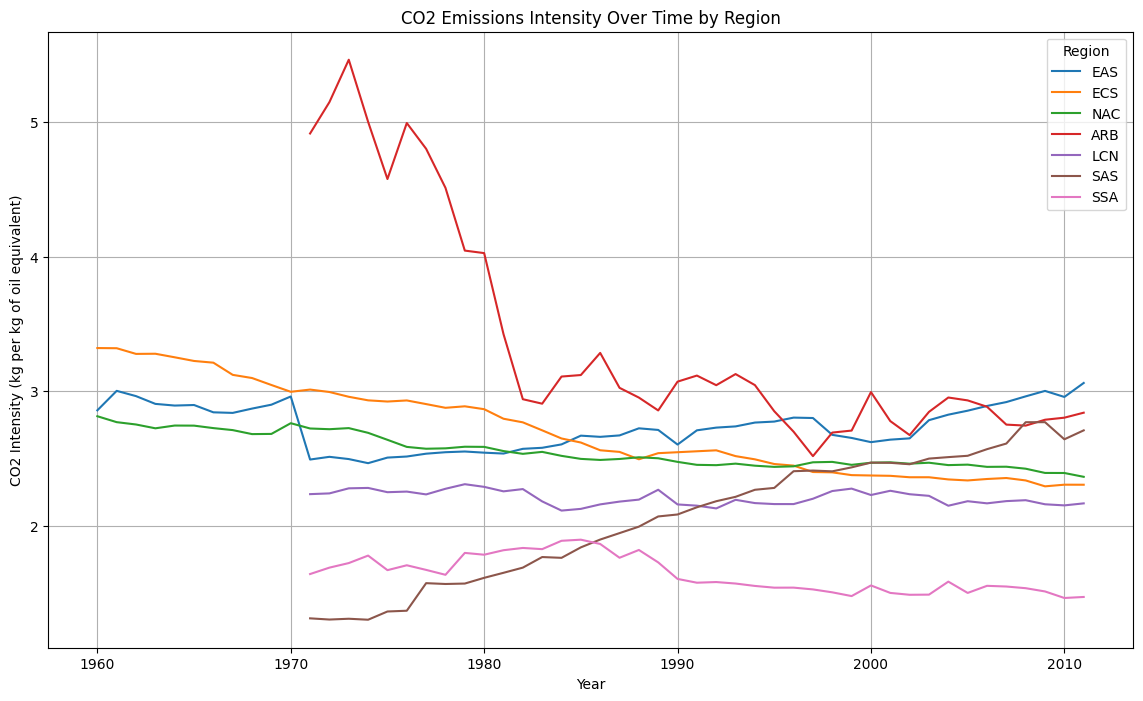

In [ ]:
co2_intensity_data = df_filtered[df_filtered['IndicatorName'] == 'CO2 intensity (kg per kg of oil equivalent energy use)']

plt.figure(figsize=(14, 8))
sns.lineplot(data=co2_intensity_data, x='Year', y='Value', hue='Region')
plt.title('CO2 Emissions Intensity Over Time by Region')
plt.xlabel('Year')
plt.ylabel('CO2 Intensity (kg per kg of oil equivalent)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


# C02 Emissions for the years 1990-2010

There are clear regional differences in CO2 emissions. Countries with darker shades, presumably the United States, parts of Europe, Russia, and possibly China and India, show higher CO2 emissions compared to other regions.

In [ ]:
import pandas as pd

co2_emissions = df[
    (df['IndicatorName'] == 'CO2 emissions (kt)') &
    (df['Year'] >= 1990) &
    (df['Year'] <= 2010)
]

import plotly.express as px

fig = px.choropleth(co2_emissions,
                    locations="CountryCode",
                    color="Value",
                    hover_name="CountryName",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Animated CO2 Emissions per Country (kt)")
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    )
)

fig.show()
